In [16]:
from IPython.display import SVG, display
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import QED
from rdkit.Chem import RDConfig
import pandas as pd
import svgutils.transform as sg
import cairosvg
import sys
import os
sys.path.append('scripts/molecule_analysis/')
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))  # add the path to SA_Score
import sascorer

In [17]:

molecules = pd.read_csv('/Users/angr1/FYP/GPT/scripts/generated_molecules/curated_molecules.csv')
molecules = molecules.sort_values(by='QED', ascending=False)
print(molecules.shape)
print(molecules.head())

# take the x molecules with highest QED
x = 6
best_molecules = molecules.head(x)
print(best_molecules.head(6))
imgs = []

(55, 2)
                                    Smiles       QED
14  COc1cccc(NC2=C(Cl)C(=O)c3ccccc3C2=O)c1  0.939687
32  COc1ccc(NC2=C(Cl)C(=O)c3ccccc3C2=O)cc1  0.939687
18         COc1ccccc1N1CCN(c2ccc(N)nc2)CC1  0.933989
7            Br.CC=C/NC/c1ccc(N2CCCCC2)nc1  0.924686
26      O=C(COc1ccccc1)Nc1ccc(N2CCOCC2)cc1  0.921633
                                    Smiles       QED
14  COc1cccc(NC2=C(Cl)C(=O)c3ccccc3C2=O)c1  0.939687
32  COc1ccc(NC2=C(Cl)C(=O)c3ccccc3C2=O)cc1  0.939687
18         COc1ccccc1N1CCN(c2ccc(N)nc2)CC1  0.933989
7            Br.CC=C/NC/c1ccc(N2CCCCC2)nc1  0.924686
26      O=C(COc1ccccc1)Nc1ccc(N2CCOCC2)cc1  0.921633
12           O=C1c2ccccc2N=C(SCc2ccco2)C1O  0.913510


QED: 0.9396865299633242, SA Score: 2.04


[07:10:41] DEPRECATION WARNING: please use MorganGenerator


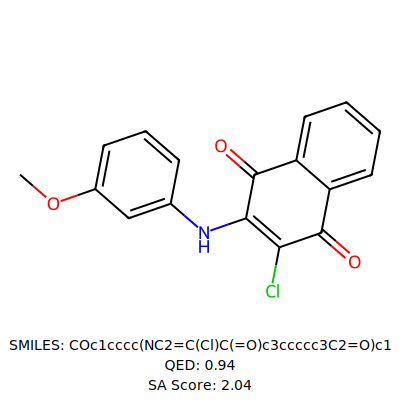

QED: 0.9396865299633242, SA Score: 1.98


[07:10:41] DEPRECATION WARNING: please use MorganGenerator


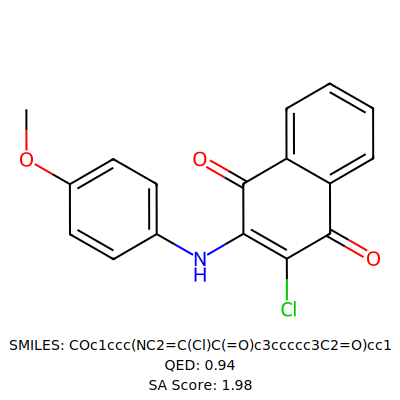

QED: 0.9339887471332411, SA Score: 1.92


[07:10:41] DEPRECATION WARNING: please use MorganGenerator


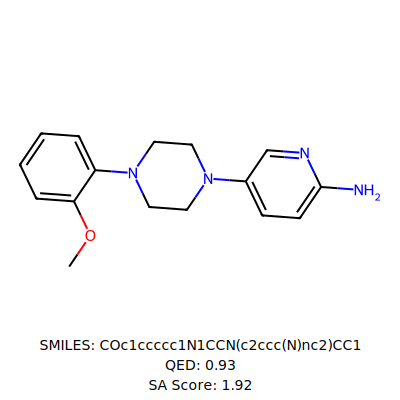

QED: 0.9246860501971074, SA Score: 2.55


[07:10:41] DEPRECATION WARNING: please use MorganGenerator


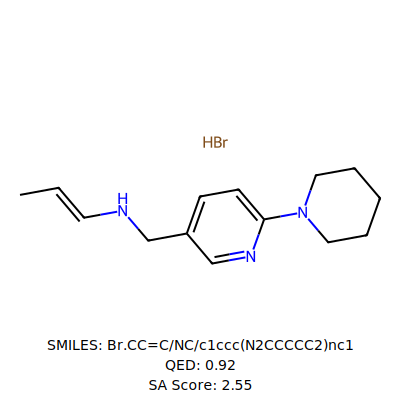

QED: 0.9216329089218167, SA Score: 1.66


[07:10:42] DEPRECATION WARNING: please use MorganGenerator


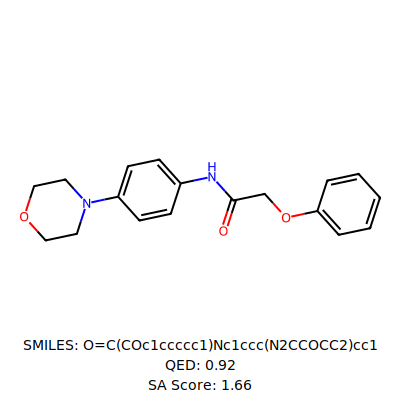

QED: 0.9135095827220252, SA Score: 3.25


[07:10:42] DEPRECATION WARNING: please use MorganGenerator


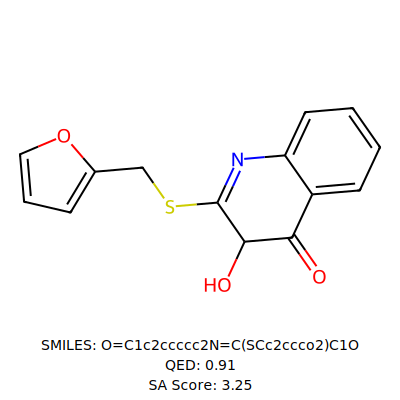

In [18]:
def draw_molecule(smiles):
    """Function to draw molecule with smiles strings, QED and SAScore, 
    based on code from: https://github.com/rdkit/rdkit/issues/2194
    """
    mol = Chem.MolFromSmiles(smiles)
    qed = QED.qed(mol)
    sa = sascorer.calculateScore(mol)
    print(f"QED: {qed}, SA Score: {sa:.2f}")
    rdDepictor.Compute2DCoords(mol)
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    # svg to text
    s = drawer.GetDrawingText()
    s = s.replace('svg:','')
    size = 14
    
    # add smiles to svg
    fig = sg.fromstring(s)
    smiles_str = sg.TextElement(200, 350, f'SMILES: {smiles}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(smiles_str)
    
    # add qed to svg
    qed_str = sg.TextElement(200, 370, f'QED: {qed:.2f}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(qed_str)
    
    # add sa score to svg
    sa_str = sg.TextElement(200, 390, f'SA Score: {sa:.2f}', size=size, 
                           font='sans-serif', anchor='middle', color='#000000')
    fig.append(sa_str)
    # Convert the SVG figure to a string
    svg_str = fig.to_str()
    display(SVG(svg_str))
    
    # save the svg to a file
    cairosvg.svg2png(bytestring=svg_str, write_to=f"/Users/angr1/FYP/GPT/scripts/generated_molecules/{qed:.3f}_{sa:3f}.png")

for mol in best_molecules['Smiles']:
    draw_molecule(mol)